In [42]:
library(popsom)
library(dplyr)
library(ggplot2)

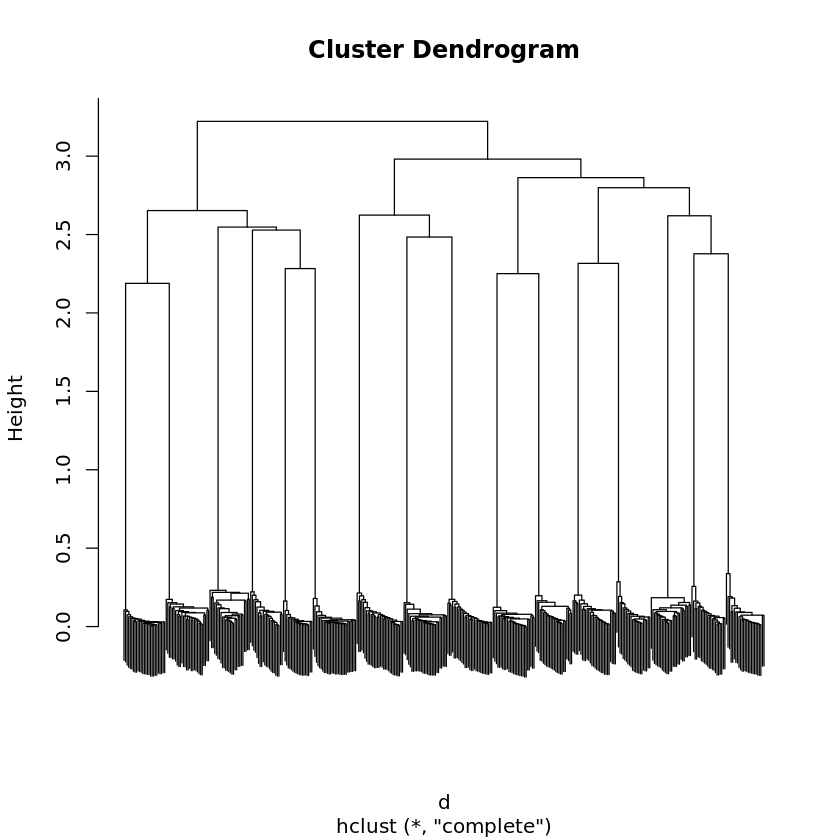

In [47]:
######## Original Data #########
dim064_test <- read.csv('dataset/dim064_test.csv')

d <- dist(as.matrix(dim064_test))   # find distance matrix 
hc <- hclust(d)                # apply hirarchical clustering 
plot(hc, labels=FALSE) 

In [11]:
######## Original Data #########
dim064_test <- read.csv('dataset/dim064_test.csv')

# for loop -- train diff times
num_train <- c()
convergs <- c()
embeds <- c()
topos <- c()

#for(i in seq(1,5))
{
  for(i in list(10,100,1000,10000,50000,100000,200000,400000))
  {
    #print(i)
    #ms = map.build(dim064_test, labels = dim064_test_label, xdim = 20, ydim = 15,alpha=0.6,train = i,algorithm="vsom")

    ms = map.build(dim064_test,  xdim = 20, ydim = 15,alpha=0.3,train = i,algorithm="vsom")

    converg = map.convergence(ms)
    embed = map.embed(ms)
    topo = map.topo(ms)$val
    num_train = c(num_train,i)
    convergs = c(convergs,converg)
    embeds = c(embeds, embed)
    topos = c(topos,topo)
    #print(converg)
  }
}

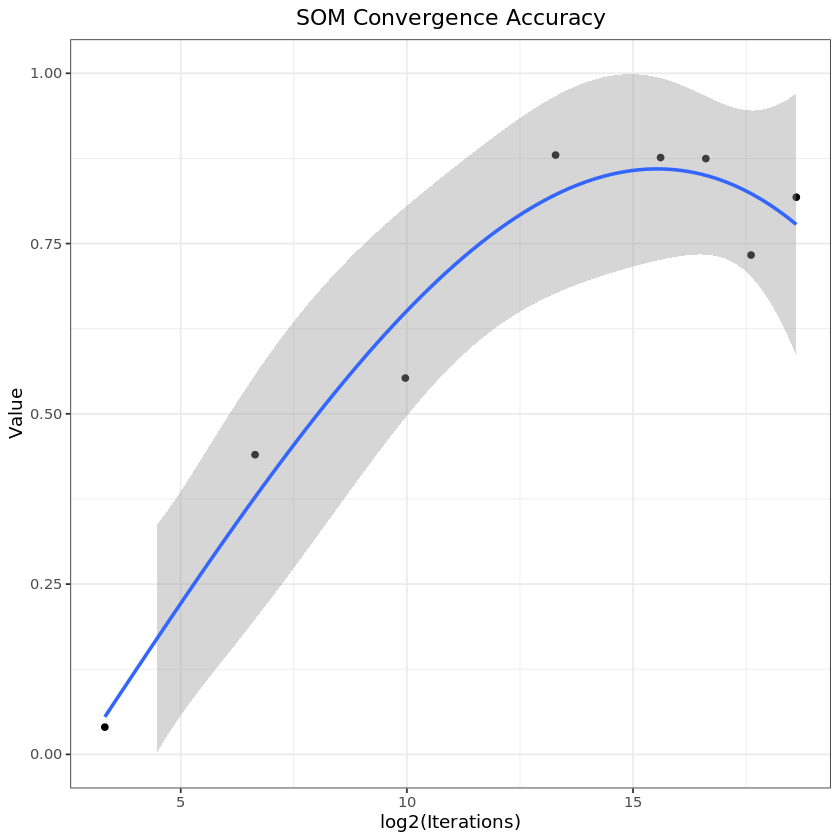

In [12]:
#plot(x = num_train,y = convergs, log = 'x', type = "o")
plotdata = data.frame(num_train,convergs, embeds, topos)
ggplot(plotdata,aes(x = log2(num_train), y = convergs)) + geom_point() + ylim(0,1)  +
  labs(title = 'SOM Convergence Accuracy',x= 'log2(Iterations)', y = 'Value') +
  stat_smooth(method = lm, formula = y ~ poly(x, 3)) +
  theme_bw() + theme(plot.title = element_text(hjust = 0.5))

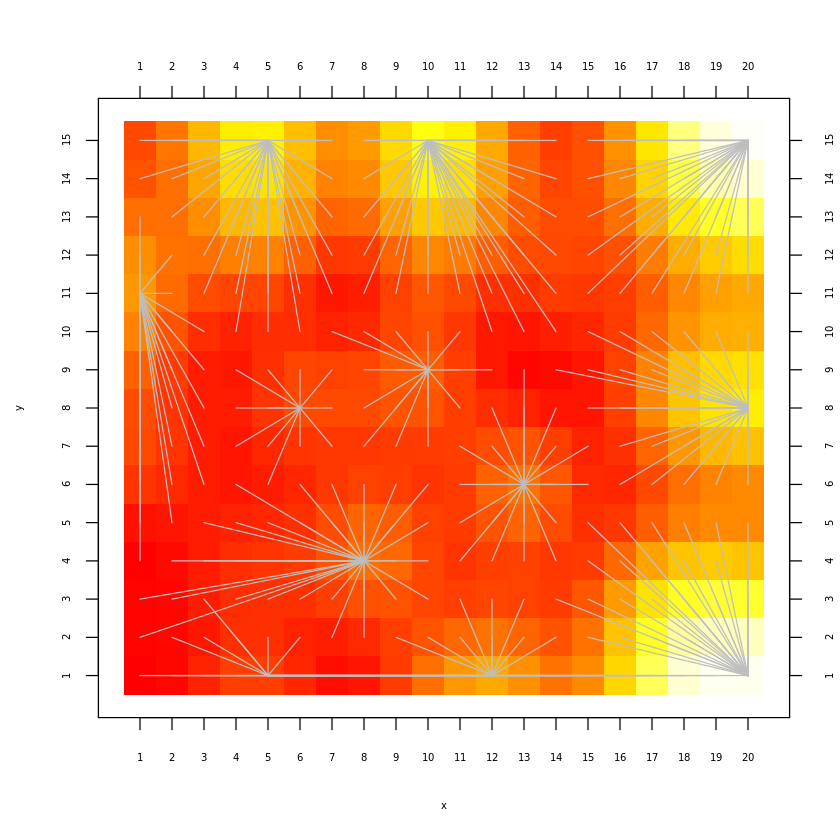

In [22]:
map.starburst(ms)

ggplot(plotdata,aes(x = log2(num_train), y = embeds)) + geom_point() + ylim(0,1)  +
  labs(title = 'SOM Embedding Accuracy',x= 'log2(Iterations)', y = 'Value') +
  stat_smooth(method = lm, formula = y ~ poly(x, 3)) +
  theme_bw() + theme(plot.title = element_text(hjust = 0.5))
ggplot(plotdata,aes(x = log2(num_train), y = topos)) + geom_point() + ylim(0,1)  +
  labs(title = 'SOM Estimated Topographic Accuracy',x= 'log2(Iterations)', y = 'Value') +
  stat_smooth(method = lm, formula = y ~ poly(x, 3)) +
  theme_bw() + theme(plot.title = element_text(hjust = 0.5))

In [43]:
########## Basic AE ############
dim064_AE <- read.csv('output/dim064_AE_encoded.csv')

# for loop -- train diff times
num_train_ae <- c()
convergs_ae <- c()
embeds_ae <- c()
topos_ae <- c()


#for(i in seq(1,5))
{
  for(i in list(10,100,1000,10000,50000,100000,200000,400000))
  {
    #ms_ae = map.build(dim064_AE, labels = dim064_test_label, xdim = 20, ydim = 15,alpha=0.6,train = i,algorithm="vsom")

    ms_ae = map.build(dim064_AE, xdim = 20, ydim = 15,alpha=0.6,train = i,algorithm="vsom")

    converg = map.convergence(ms_ae)
    embed = map.embed(ms_ae)
    topo = map.topo(ms_ae)$val
    num_train_ae = c(num_train_ae,i)
    convergs_ae = c(convergs_ae,converg)
    embeds_ae = c(embeds_ae,embed)
    topos_ae = c(topos_ae,topo)
    print(converg)

  }
}

[1] 0.04
[1] 0.42
[1] 0.7259164
[1] 0.8843248
[1] 0.8810164
[1] 0.8363416
[1] 0.96
[1] 0.99


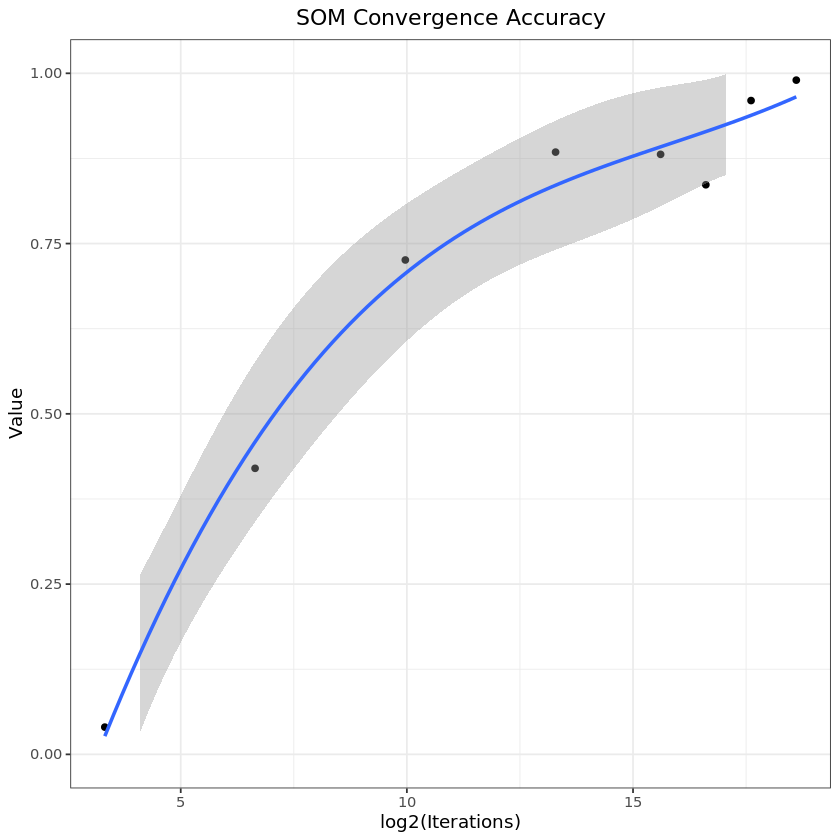

In [44]:
#plot(x = num_train,y = convergs, log = 'x', type = "o")
plotdata = data.frame(num_train_ae,convergs_ae, embeds_ae, topos_ae)
ggplot(plotdata,aes(x = log2(num_train_ae), y = convergs_ae)) + geom_point() + ylim(0,1)  +
  labs(title = 'SOM Convergence Accuracy',x= 'log2(Iterations)', y = 'Value') +
  stat_smooth(method = lm, formula = y ~ poly(x, 3)) +
  theme_bw() + theme(plot.title = element_text(hjust = 0.5))

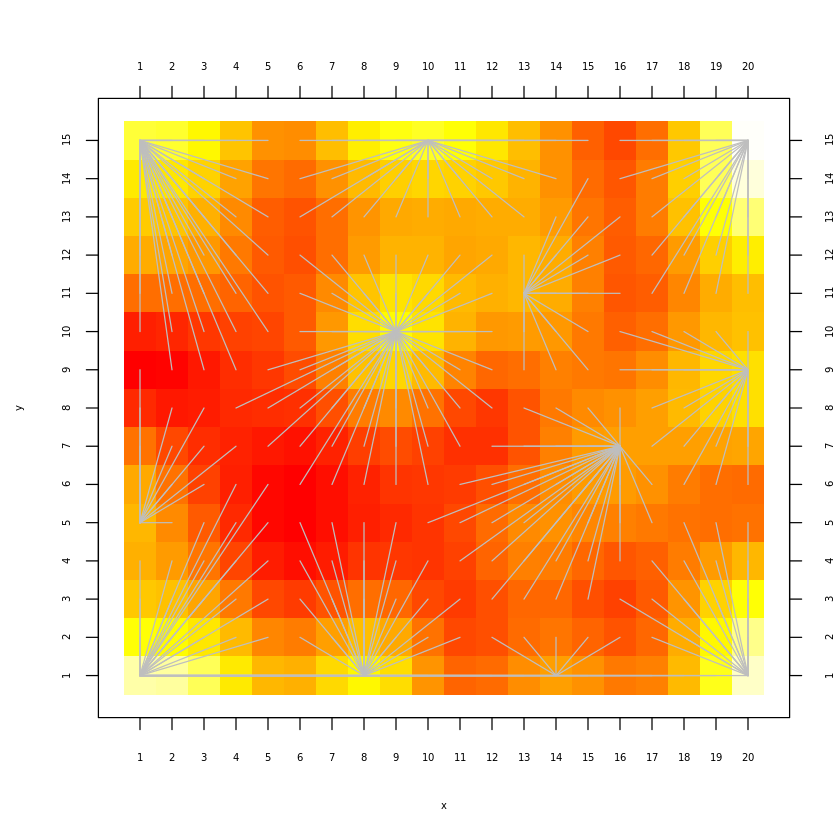

In [45]:
map.starburst(ms_ae)

plotdata_ae = read.csv("./paper/dim064_plot/plot_AE.csv", sep = "")
plotdata_ae = data.frame(num_train_ae,convergs_ae,embeds_ae,topos_ae)

ggplot(plotdata_ae,aes(x = log2(num_train_ae), y = convergs_ae)) + geom_point() + ylim(0,1)  +
  labs(title = 'AE_SOM Convergence Accuracy',x= 'log2(Iterations)', y = 'Value') +
  stat_smooth(method = lm, formula = y ~ poly(x, 3)) + 
  theme_bw() + theme(plot.title = element_text(hjust = 0.5))
ggplot(plotdata_ae,aes(x = log2(num_train_ae), y = embeds_ae)) + geom_point() + ylim(0,1)  +
  labs(title = 'AE_SOM Embedding Accuracy',x= 'log2(Iterations)', y = 'Value') +
  stat_smooth(method = lm, formula = y ~ poly(x, 3)) + 
  theme_bw() + theme(plot.title = element_text(hjust = 0.5))
ggplot(plotdata_ae,aes(x = log2(num_train_ae), y = topos_ae)) + geom_point() + ylim(0,1)  +
  labs(title = 'AE_SOM Estimated Topographic Accuracy',x= 'log2(Iterations)', y = 'Value') +
  stat_smooth(method = lm, formula = y ~ poly(x, 4)) + 
  theme_bw() + theme(plot.title = element_text(hjust = 0.5))

ms_ae <- map.build(dim064_AE, labels = dim064_test_label, xdim = 20, ydim = 15,alpha=0.6,
                   train =500000,algorithm="vsom")
ms_ae1 <- map.build(dim064_AE, labels = dim064_test_label, xdim = 20, ydim = 15,alpha=0.6,
                    train =400000,algorithm="vsom")
map.embed(ms_ae1)
map.convergence(ms_ae1)
map.starburst(ms_ae1)
map.significance(ms_ae1)

In [ ]:
########### SAE ############
dim064_SAE <- read.csv('dim064_SAE_encoded.csv')

# for loop -- train diff times
num_train_sae <- c()
convergs_sae <- c()
embeds_sae <- c()
topos_sae <- c()


for(i in seq(1,5)){
  for(i in list(10,100,1000,10000,50000,100000,200000,400000))
  {
    ms_sae = map.build(dim064_SAE, labels = dim064_test_label, xdim = 20, ydim = 15,alpha=0.6,train = i,algorithm="vsom")
    converg = map.convergence(ms_sae)
    embed = map.embed(ms_sae)
    topo = map.topo(ms_sae)$val
    num_train_sae = c(num_train_sae,i)
    convergs_sae = c(convergs_sae,converg)
    embeds_sae =c(embeds_sae, embed)
    topos_sae = c(topos_sae,topo)
    # print(i)
    # print(embed)
    print(converg)
  }
}

plotdata_sae = data.frame(num_train_sae,convergs_sae,embeds_sae,topos_sae)
plotdata_sae = read.csv("./paper/dim064_plot/plot_SAE.csv", sep = "")

ggplot(plotdata_sae,aes(x = log2(num_train_sae), y = convergs_sae)) + geom_point() + ylim(0,1)  +
  labs(title = 'SAE_SOM Convergence Accuracy',x= 'log2(Iterations)', y = 'Value') +
  stat_smooth(method = lm, formula = y ~ poly(x, 3))  + 
  theme_bw() + theme(plot.title = element_text(hjust = 0.5))
ggplot(plotdata_sae,aes(x = log2(num_train_sae), y = embeds_sae)) + geom_point() + ylim(0,1)  +
  labs(title = 'SAE_SOM Embedding Accuracy',x= 'log2(Iterations)', y = 'Value') +
  stat_smooth(method = lm, formula = y ~ poly(x, 2))  + 
  theme_bw() + theme(plot.title = element_text(hjust = 0.5))
ggplot(plotdata_sae,aes(x = log2(num_train_sae), y = topos_sae)) + geom_point() + ylim(0,1)  +
  labs(title = 'SAE_SOM Estimated Topographic Accuracy',x= 'log2(Iterations)', y = 'Value') +
  stat_smooth(method = lm, formula = y ~ poly(x, 4))  + 
  theme_bw() + theme(plot.title = element_text(hjust = 0.5))


ms_sae <- map.build(dim064_SAE, labels = dim064_test_label, xdim = 20, ydim = 15,alpha=0.6,
                    train =10000,algorithm="vsom")
ms_sae1 <- map.build(dim064_SAE, labels = dim064_test_label, xdim = 20, ydim = 15,alpha=0.6,
                     train =400000,algorithm="vsom")
map.embed(ms_sae1)
map.convergence(ms_sae1)
map.starburst(ms_sae1)
map.significance(ms_sae1)


############# CAE ################
dim064_CAE <- read.csv('dim064_CAE_encoded.csv')

# for loop -- train diff times
num_train_cae <- c()
convergs_cae <- c()
embeds_cae <- c()
topos_cae <- c()


for(i in seq(1,5)){
  for(i in list(10,100,1000,10000,50000,100000,200000,400000))
  {
    ms_cae = map.build(dim064_CAE, labels = dim064_test_label, xdim = 20, ydim = 15,alpha=0.6,train = i,algorithm="vsom")
    converg = map.convergence(ms_cae)
    embed = map.embed(ms_cae)
    topo = map.topo(ms_cae)$val
    num_train_cae = c(num_train_cae,i)
    convergs_cae = c(convergs_cae,converg)
    embeds_cae = c(embeds_cae,embed)
    topos_cae = c(topos_cae,topo)
    print(converg)

  }
}

plotdata_cae = data.frame(num_train_cae,convergs_cae,embeds_cae,topos_cae)
plotdata_cae = read.csv("./paper/dim064_plot/plot_CAE.csv", sep = "")

ggplot(plotdata_cae,aes(x = log2(num_train_cae), y = convergs_cae)) + geom_point() + ylim(0,1)  +
  labs(title = 'CAE_SOM Convergence Accuracy',x= 'log2(Iterations)', y = 'Value') +
  stat_smooth(method = lm, formula = y ~ poly(x, 2)) + 
  theme_bw() + theme(plot.title = element_text(hjust = 0.5))
ggplot(plotdata_cae,aes(x = log2(num_train_cae), y = embeds_cae)) + geom_point() + ylim(0,1)  +
  labs(title = 'CAE_SOM Embedding Accuracy',x= 'log2(Iterations)', y = 'Value') +
  stat_smooth(method = lm, formula = y ~ poly(x, 3)) + 
  theme_bw() + theme(plot.title = element_text(hjust = 0.5))
ggplot(plotdata_cae,aes(x = log2(num_train_cae), y = topos_cae)) + geom_point() + ylim(0,1)  +
  labs(title = 'CAE_SOM Estimated Topographic Accuracy',x= 'log2(Iterations)', y = 'Value') +
  stat_smooth(method = lm, formula = y ~ poly(x, 4)) + 
  theme_bw() + theme(plot.title = element_text(hjust = 0.5))


ms_cae <- map.build(dim064_CAE, labels = dim064_test_label, xdim = 20, ydim = 15,alpha=0.6,
                    train =50000,algorithm="vsom")
ms_cae1 <- map.build(dim064_CAE, labels = dim064_test_label, xdim = 20, ydim = 15,alpha=0.6,
                     train =400000,algorithm="vsom")
map.embed(ms_cae1)
map.convergence(ms_cae1)
map.starburst(ms_cae1)
map.topo(ms_cae1)$val

map.significance(ms_cae)

############# DAE ################
dim064_DAE <- read.csv('dim064_DAE_encoded.csv')

# for loop -- train diff times
num_train_dae <- c()
convergs_dae <- c()
embeds_dae <- c()
topos_dae <- c()

for( i in seq(1,5)){
  for(i in list(10,100,1000,10000,50000,100000,200000,400000))
  {
    ms_dae = map.build(dim064_DAE, labels = dim064_test_label, xdim = 20, ydim = 15,alpha=0.6,train = i,algorithm="vsom")
    converg = map.convergence(ms_dae)
    embed = map.embed(ms_dae)
    topo = map.topo(ms_dae)$val
    num_train_dae = c(num_train_dae,i)
    convergs_dae = c(convergs_dae,converg)
    embeds_dae = c(embeds_dae,embed)
    topos_dae = c(topos_dae,topo)
    print(converg)
  }
}

plotdata_dae = data.frame(num_train_dae,convergs_dae,embeds_dae,topos_dae)
plotdata_dae = read.csv("./paper/dim064_plot/plot_DAE.csv", sep = "")

ggplot(plotdata_dae,aes(x = log2(num_train_dae), y = convergs_dae)) + geom_point() + ylim(0,1)  +
  labs(title = 'DAE_SOM Convergence Accuracy',x= 'log2(Iterations)', y = 'Value') +
  stat_smooth(method = lm, formula = y ~ poly(x, 3)) + 
  theme_bw() + theme(plot.title = element_text(hjust = 0.5))
ggplot(plotdata_dae,aes(x = log2(num_train_dae), y = embeds_dae)) + geom_point() + ylim(0,1)  +
  labs(title = 'DAE_SOM Embedding Accuracy',x= 'log2(Iterations)', y = 'Value') +
  stat_smooth(method = lm, formula = y ~ poly(x, 2)) + 
  theme_bw() + theme(plot.title = element_text(hjust = 0.5))
ggplot(plotdata_dae,aes(x = log2(num_train_dae), y = topos_dae)) + geom_point() + ylim(0,1)  +
  labs(title = 'DAE_SOM Estimated Topographic Accuracy',x= 'log2(Iterations)', y = 'Value') +
  stat_smooth(method = lm, formula = y ~ poly(x, 4)) + 
  theme_bw() + theme(plot.title = element_text(hjust = 0.5))


ms_dae <- map.build(dim064_DAE, labels = dim064_test_label, xdim = 20, ydim = 15,alpha=0.6,
                    train =10000,algorithm="vsom")
ms_dae1 <- map.build(dim064_DAE, labels = dim064_test_label, xdim = 20, ydim = 15,alpha=0.6,
                     train =400000,algorithm="vsom")
map.embed(ms_dae1)
map.convergence(ms_dae1)
map.starburst(ms_dae1)
map.significance(ms_dae)

############## ConvAE #############
dim064_conAE <- read.csv('dim064_ConAE_encoded.csv')

# for loop -- train diff times
num_train_conae <- c()
convergs_conae <- c()
embeds_conae <- c()
topos_conae <- c()

for(i in seq(1,5)){
  for(i in list(10,100,1000,10000,50000,100000,200000,400000))
  {
    ms_conae = map.build(dim064_conAE, labels = dim064_test_label, 
                         xdim = 20, ydim = 15,alpha=0.6,train = i,algorithm="vsom")
    converg = map.convergence(ms_conae)
    embed = map.embed(ms_conae)
    topo = map.topo(ms_conae)$val
    num_train_conae = c(num_train_conae,i)
    convergs_conae = c(convergs_conae,converg)
    embeds_conae = c(embeds_conae,embed)
    topos_conae = c(topos_conae,topo)
    print(converg)
  }
}


plotdata_conae = data.frame(num_train_conae,convergs_conae,embeds_conae,topos_conae)
plotdata_conae = read.csv("./paper/dim064_plot/plot_ConvAE.csv", sep = "")

ggplot(plotdata_conae,aes(x = log2(num_train_conae), y = convergs_conae)) + geom_point() + ylim(0,1)  +
  labs(title = 'ConvAE_SOM Convergence Accuracy',x= 'log2(Iterations)', y = 'Value') +
  stat_smooth(method = lm, formula = y ~ poly(x, 3)) + 
  theme_bw() + theme(plot.title = element_text(hjust = 0.5))
ggplot(plotdata_conae,aes(x = log2(num_train_conae), y = embeds_conae)) + geom_point() + ylim(0,1)  +
  labs(title = 'ConvAE_SOM Embedding Accuracy',x= 'log2(Iterations)', y = 'Value') +
  stat_smooth(method = lm, formula = y ~ poly(x, 4)) + 
  theme_bw() + theme(plot.title = element_text(hjust = 0.5))
ggplot(plotdata_conae,aes(x = log2(num_train_conae), y = topos_conae)) + geom_point() + ylim(0,1)  +
  labs(title = 'ConvAE_SOM Estimated Topographic Accuracy',x= 'log2(Iterations)', y = 'Value') +
  stat_smooth(method = lm, formula = y ~ poly(x, 5)) + 
  theme_bw() + theme(plot.title = element_text(hjust = 0.5))


ms_conae <- map.build(dim064_conAE, labels = dim064_test_label, xdim = 20, ydim = 15,alpha=0.6,
                      train =50000,algorithm="vsom")
ms_conae1 <- map.build(dim064_conAE, labels = dim064_test_label, xdim = 20, ydim = 15,alpha=0.6,
                       train =400000,algorithm="vsom")
map.embed(ms_conae1)
map.convergence(ms_conae)
map.starburst(ms_conae)
map.significance(ms_conae)


plotdata = read.csv('./paper/dim064_plot/plotdim064.csv',sep = "")